In [8]:
from __future__ import division
import glob
import collections
import sys
import pyfastaq
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from pistis import plots, utils
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
fname = glob.glob('../nanotest/*.fastq.gz')[0]
fname

'../nanotest/reads.fastq.gz'

In [9]:
fq = pyfastaq.sequences.file_reader(fname)
print(type(fq))

<class 'generator'>


In [3]:
(gc_content,
     read_lengths,
     mean_quality_scores,
     df_start, df_end) = utils.collect_fastq_data(fname)

# GC Content

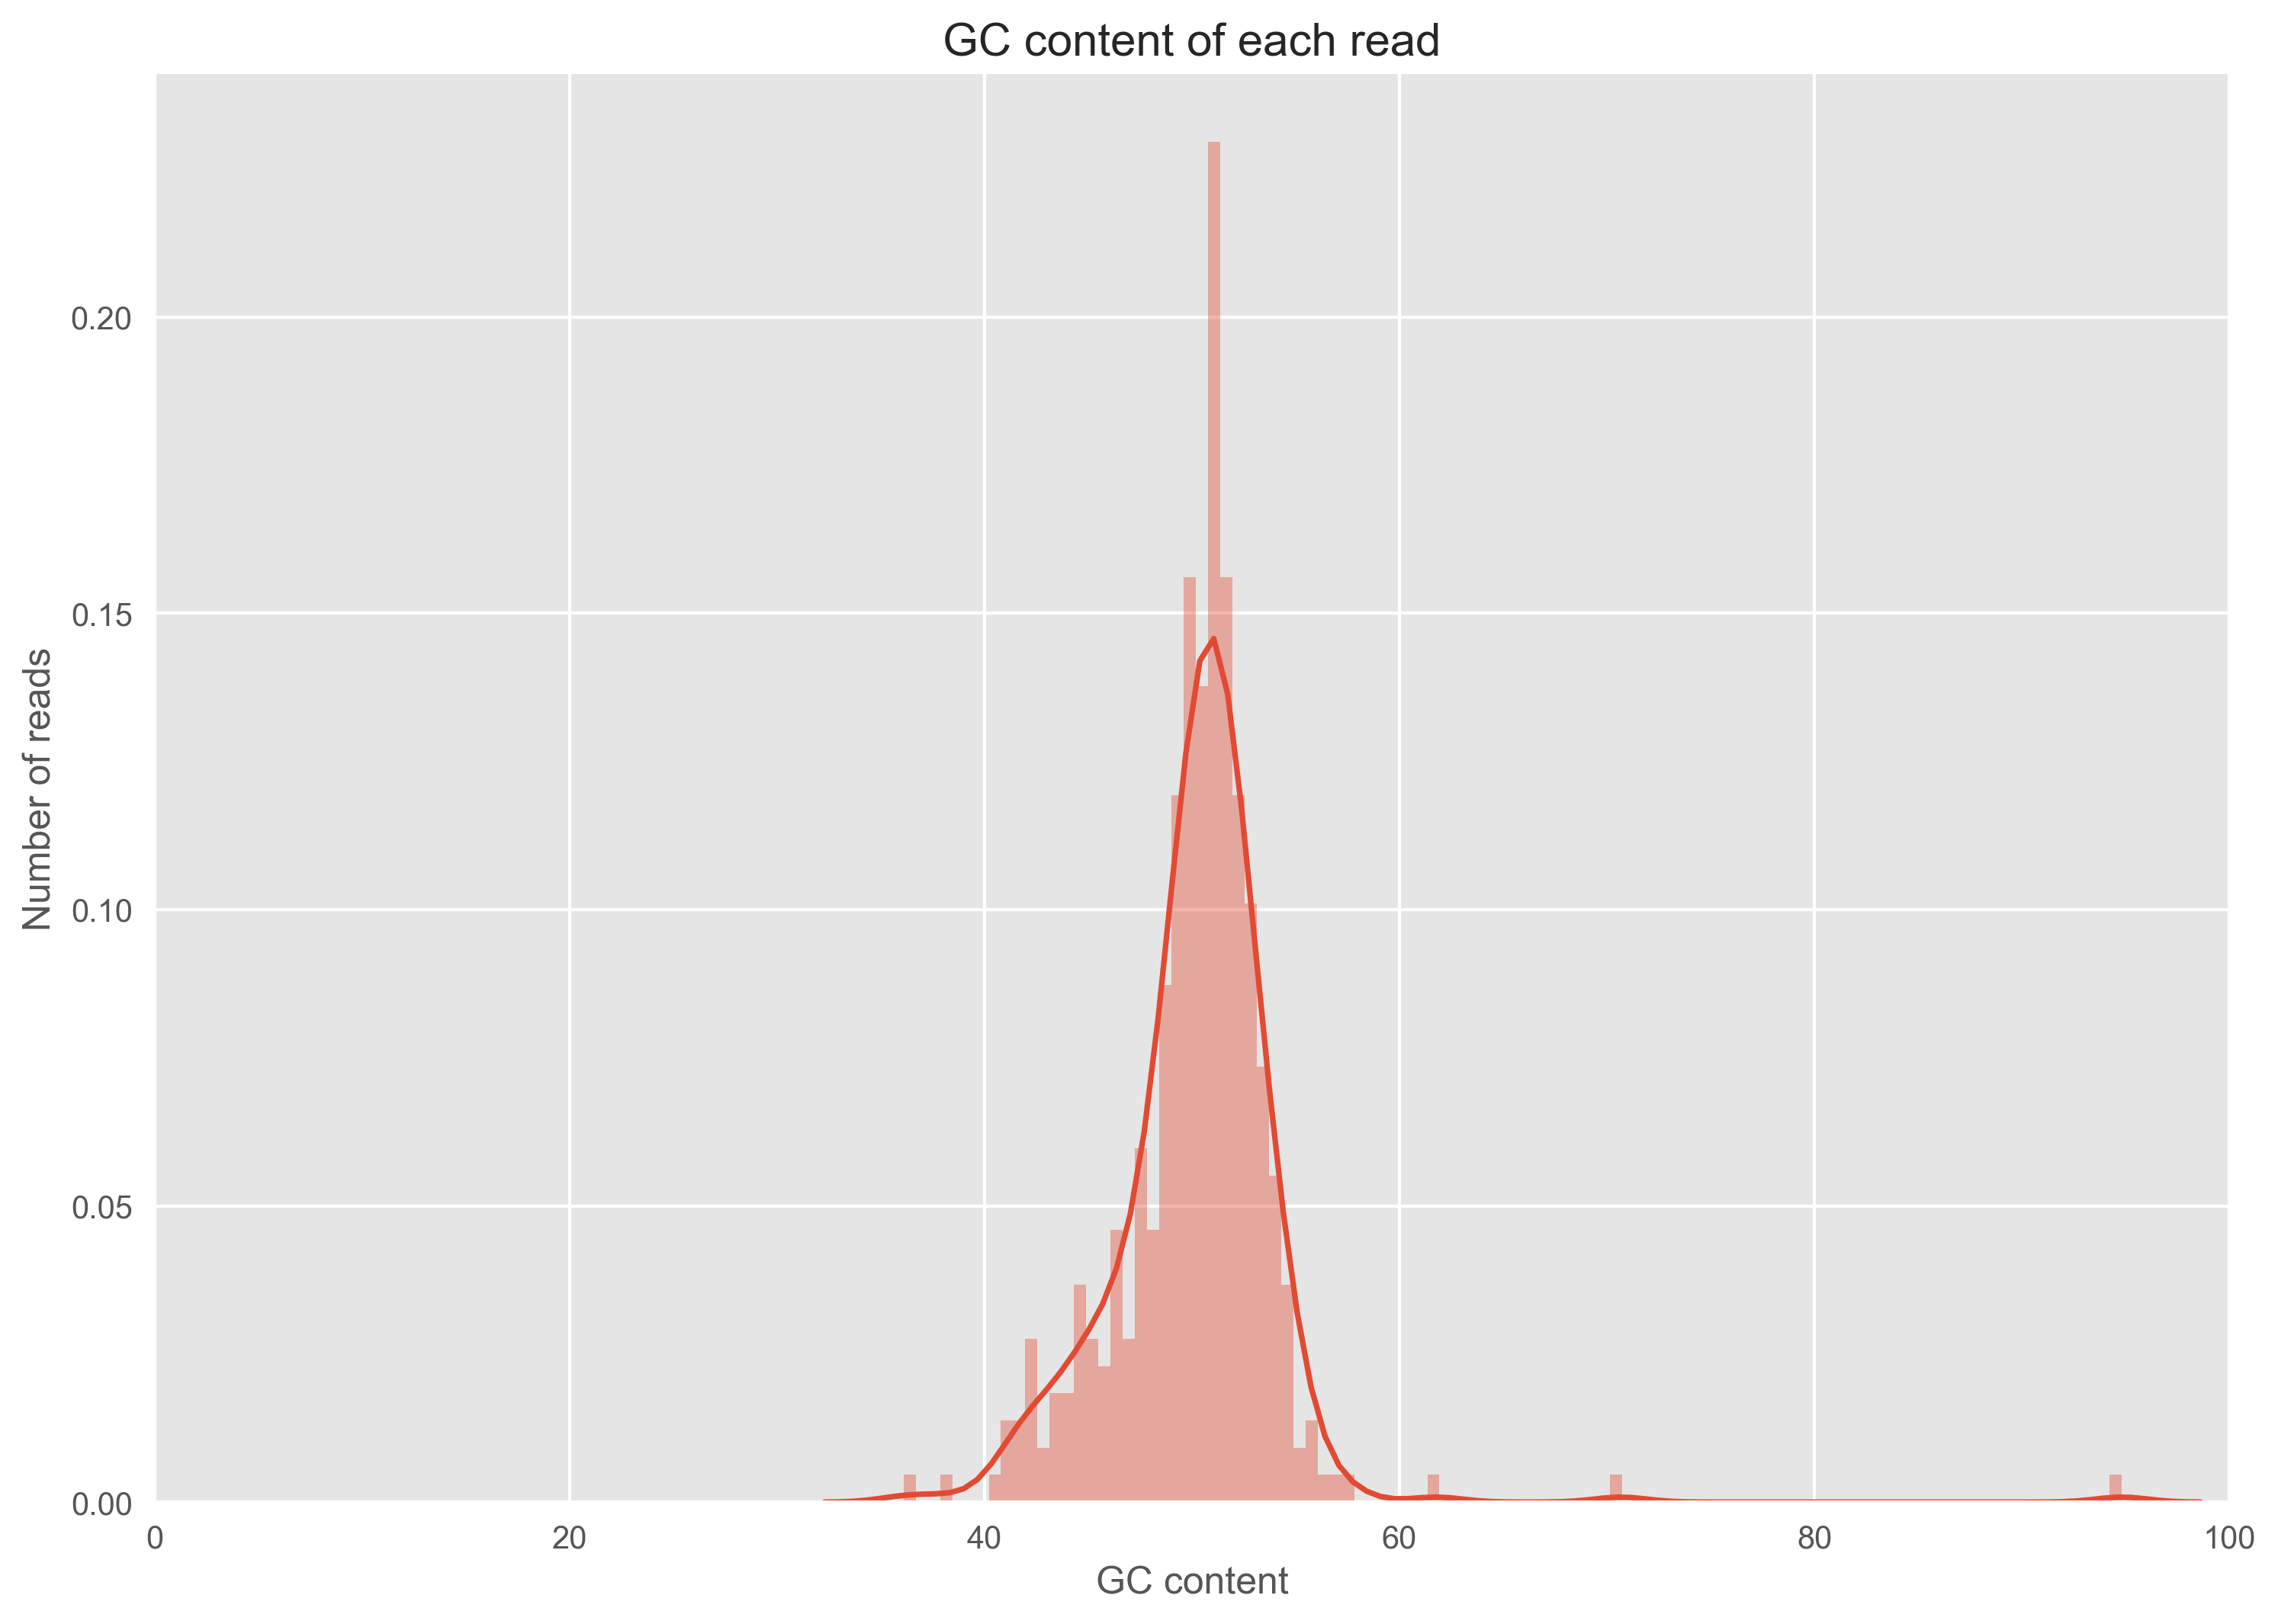

In [6]:
__ = plots.gc_plot(gc_content)

# Read Length vs Mean Read Quality Score

In [ ]:
__ = plots.length_vs_qual_plot(read_lengths, mean_quality_scores)

# Plot quality score across reads in bins

In [ ]:
__ = plots.quality_per_position(df_start, 'start')

In [ ]:
__ = plots.quality_per_position(df_end, 'end')

# Save plots to a single PDF

In [ ]:
save_as = 'foo.pdf'

plot1 = gc_plot(gc_content)
plot2 = length_vs_qual_plot(read_len, mean_qual)
plot3 = quality_per_position(df_start, 'start')
plot4 = quality_per_position(df_end, 'end')
pp = PdfPages(save_as)
pp.savefig(plot1)
pp.savefig(plot2)
pp.savefig(plot3)
pp.savefig(plot4)
pp.close()

# Mean positional quality score for first *n* bases

In [ ]:
def read_end_quality(all_q_scores, length_from_end, from_end='start'):
    linewidth = 1.5
    size = (11.7, 8.27)  # A4
    from_end = from_end.lower()
    dpi = 300
    xlabel = 'Distance from end of read (bp)'
    ylabel = 'Mean quality (Phred) score'
    title = 'Average quality at the {} of the reads'.format(from_end)
    ylim = (0, 50)

    first_n_qscores = []
    for qscores in all_qscores:
        if from_end == 'start':
            qs = qscores[:length_from_end]
        elif from_end == 'end':
            qs = qscores[-length_from_end:]
        first_n_qscores.append(qs)

    xs = [0] * length_from_end
    for i, scores in enumerate(first_n_qscores):
        for j, s in enumerate(scores):
            xs[j] += s

    num_qscores = len(first_n_qscores)
    for i, s in enumerate(xs):
        xs[i] /= num_qscores
    fig, ax = plt.subplots(figsize=size, dpi=dpi)
    p = ax.plot(xs, linewidth=linewidth)
    if from_end == 'end':
        __ = ax.set_xticks(np.arange(0, length_from_end+1, length_from_end//6))
        __ = ax.set_xticklabels(np.arange(0, length_from_end+1, length_from_end//6)[::-1])
        
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title, ylim=ylim)
    sns.despine()
    return fig

In [ ]:
length = 300
__ = read_end_quality(all_qscores, length)

# Mean positional quality score for last *n* bases

In [ ]:
__ = read_end_quality(all_qscores, length, from_end='end')

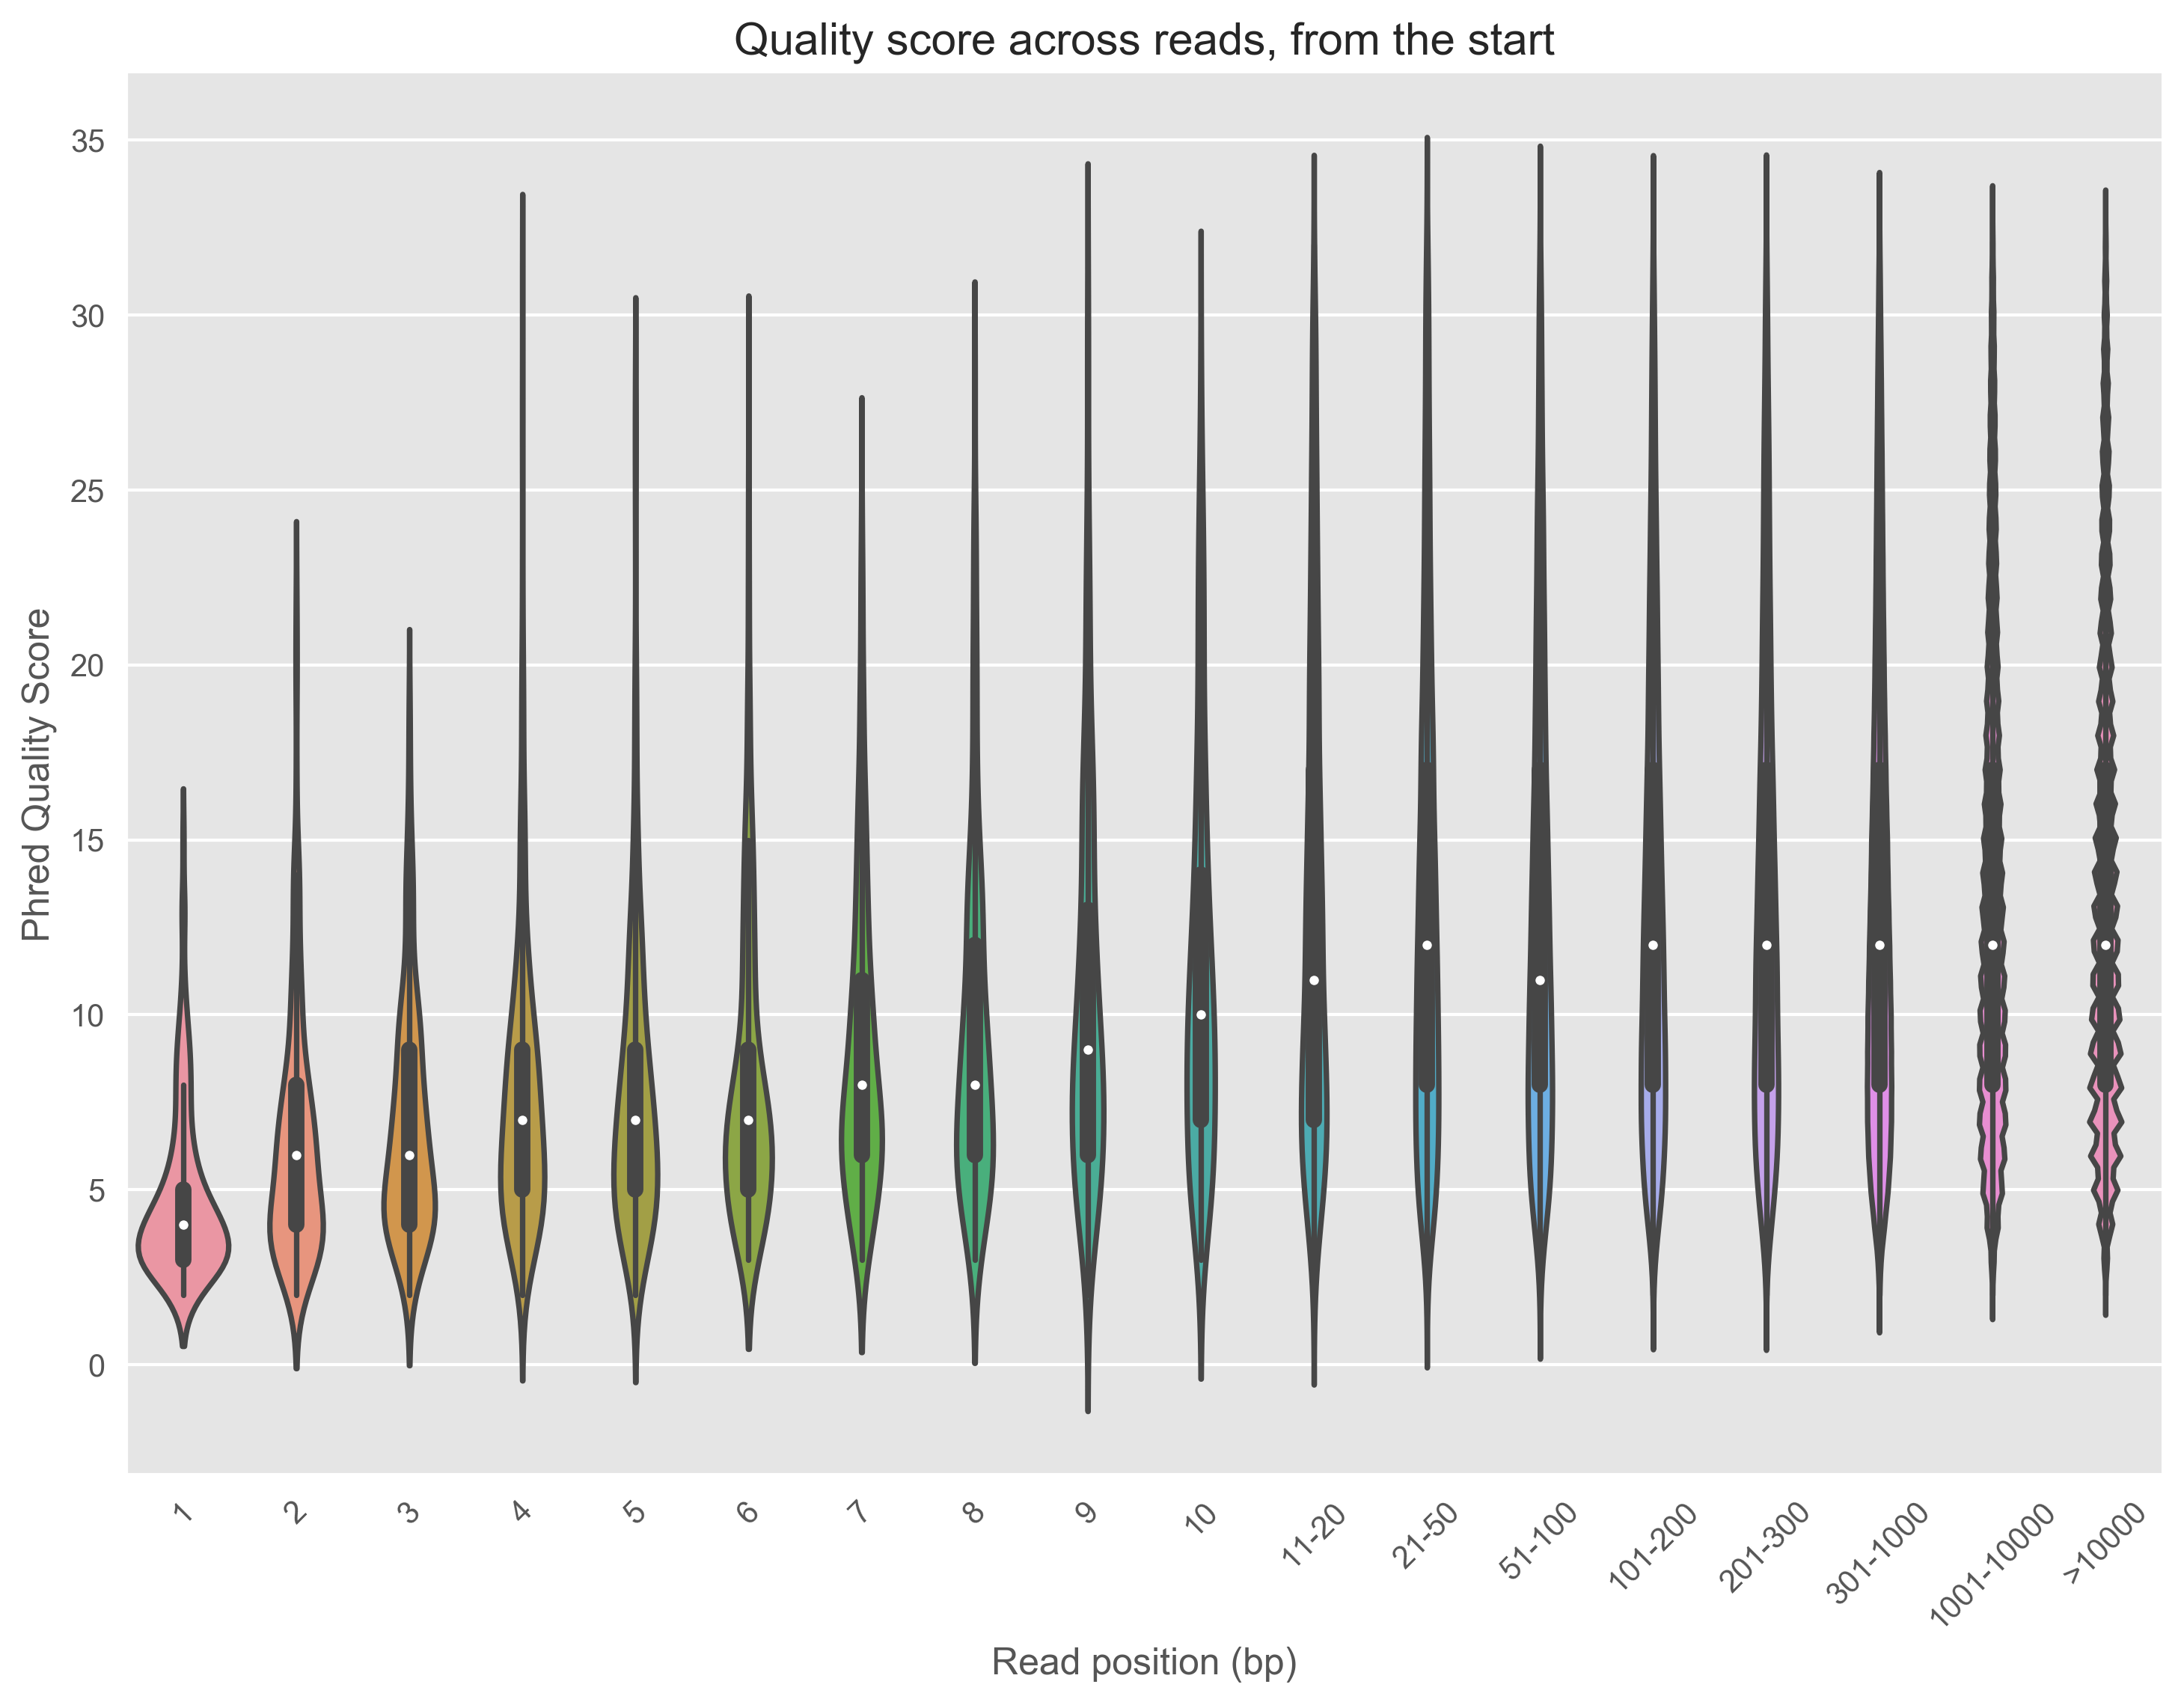

In [5]:
plt.style.use('ggplot')

data = df_start
FIGURE_SIZE = (11.7, 8.27)
DPI = 300
from_end = 'start'
if from_end.lower() == 'start':
    col_names = data.columns
elif from_end.lower() == 'end':
    col_names = data.columns[::-1]
else:
    raise Exception("'start' and 'end' are the only options allowed for "
                    "plotting quality per position.")

title = 'Quality score across reads, from the {}'.format(from_end)
xlabel = 'Read position (bp)'
ylabel = 'Phred Quality Score'
cut = 0  # cuts the violin plot at max and min values (doesn't extrapolate)

fig, axes = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)
# plot = sns.stripplot(data=data, ax=axes, order=col_names, jitter=True)
plot = sns.violinplot(data=data, ax=axes, order=col_names)
plot.set(xlabel=xlabel, ylabel=ylabel, title=title)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
sns.despine()

In [ ]:
df = df_start.melt(var_name='p', value_name='q')

In [ ]:
plt.scatter(x=df['p'], y=df['q'])